## Analysis of the Breast Cancer Seer 2010-2016 Dataset

The main focus of this project was to use the US Breast Cancer patient cohort data from 2010 -2016 available in the SEER Incidence Database (specifically - Incidence - SEER 18 Regs Research Data + Hurricane Katrina Impacted Louisiana Cases, Nov 2018 Sub(1975-2016 varying) to :

1.	Evaluate the percent of Breast Cancer patients based on factors such as Race, Age, Stage, Grade, Subtype, Number of In Situ tumors and Number of positive regional lymph nodes
2.	Evaluate the percent distribution of Breast Cancer patients across the United States 
3.	Evaluate any correlation between breast cancer survival outcomes and socioeconomic factors such as poverty and median income levels within the state which has the highest percentage of the Breast Cancer patient population
4.	Evaluate the survival and death rates among the above mentioned groups

### Database Citation:

Surveillance, Epidemiology, and End Results (SEER) Program (www.seer.cancer.gov) SEER*Stat Database: Incidence - SEER 18 Regs Research Data + Hurricane Katrina Impacted Louisiana Cases, Nov 2018 Sub (1975-2016 varying) - Linked To County Attributes - Total U.S., 1969-2017 Counties, National Cancer Institute, DCCPS, Surveillance Research Program, released April 2019, based on the November 2018 submission.


### Step 1: Import the required modules and packages

In [1]:
# Step 1: Import all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from statsmodels.graphics.mosaicplot import mosaic
import pylab
from itertools import product
import joblib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Step 2: SEER 18 Breast Cancer 2010 -2016 Dataset generated from SEER* Stat used for this project


In [22]:
# Step 2: Load and read the dataset (SEER BC Incidence dataset -2010 to 2016)
# URL - https://seer.cancer.gov/data/ Data access requested and then data downloaded
# Malignant cases were selected during the Query Generation in the SEER database tool

seer18_bc = pd.read_csv(r"/Users/shilpakamath-jha/Desktop/SEERDATASET/ComprehensiveSEER18BCDataset2010to2016.csv", sep = ',')
seer18_bc.dtypes

Age recode with <1 year olds                            object
Age at diagnosis                                         int64
Age recode with single ages and 85+                     object
Race/ethnicity                                          object
Sex                                                     object
Year of diagnosis                                        int64
Race recode (White, Black, Other)                       object
State-county                                            object
Site recode ICD-O-3/WHO 2008                            object
Breast - Adjusted AJCC 6th Stage (1988-2015)            object
Breast - Adjusted AJCC 6th T (1988-2015)                object
Breast - Adjusted AJCC 6th N (1988-2015)                object
Breast - Adjusted AJCC 6th M (1988-2015)                object
Breast Subtype (2010+)                                  object
ER Status Recode Breast Cancer (1990+)                  object
PR Status Recode Breast Cancer (1990+)                 

### Step 3: Exploratory Data Analysis 

#### Data clean up and structuring

In [23]:
## Step 3a - Get info on the data to see how many null values are there and the data types
# There are 3532 male patient records in the dataset

# There are 524 null values in four features:

# Breast - Adjusted AJCC 6th Stage (1988-2015)
# Breast - Adjusted AJCC 6th T (1988-2015)
# Breast - Adjusted AJCC 6th N (1988-2015)
# Breast - Adjusted AJCC 6th M (1988-2015)

seer18_bc.info()
seer18_bc['Sex'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446806 entries, 0 to 446805
Data columns (total 34 columns):
 #   Column                                                Non-Null Count   Dtype 
---  ------                                                --------------   ----- 
 0   Age recode with <1 year olds                          446806 non-null  object
 1   Age at diagnosis                                      446806 non-null  int64 
 2   Age recode with single ages and 85+                   446806 non-null  object
 3   Race/ethnicity                                        446806 non-null  object
 4   Sex                                                   446806 non-null  object
 5   Year of diagnosis                                     446806 non-null  int64 
 6   Race recode (White, Black, Other)                     446806 non-null  object
 7   State-county                                          446806 non-null  object
 8   Site recode ICD-O-3/WHO 2008                          

Female    443274
Male        3532
Name: Sex, dtype: int64

In [24]:
# Step 3b - Droppped the rows which contained records for male breast cancer patients (3532 records).
# Confirmed that the rwos were dropped

seer18_bc_minus_males = seer18_bc[seer18_bc.Sex != 'Male']
seer18_bc_minus_males.info()
seer18_bc_minus_males['Sex'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443274 entries, 0 to 446805
Data columns (total 34 columns):
 #   Column                                                Non-Null Count   Dtype 
---  ------                                                --------------   ----- 
 0   Age recode with <1 year olds                          443274 non-null  object
 1   Age at diagnosis                                      443274 non-null  int64 
 2   Age recode with single ages and 85+                   443274 non-null  object
 3   Race/ethnicity                                        443274 non-null  object
 4   Sex                                                   443274 non-null  object
 5   Year of diagnosis                                     443274 non-null  int64 
 6   Race recode (White, Black, Other)                     443274 non-null  object
 7   State-county                                          443274 non-null  object
 8   Site recode ICD-O-3/WHO 2008                          

array(['Female'], dtype=object)

In [25]:
# Step 3c - Drop columns which are not going to be analyzed

seer18_bc_minus_males.drop(['Sex','Age recode with single ages and 85+','Site recode ICD-O-3/WHO 2008', 'Lymph-vascular Invasion (2004+ varying by schema)', 
               'CS lymph nodes (2004-2015)', 'CS tumor size (2004-2015)', 'CS Mets Eval (2004-2015)', 'CS version derived (2004-2015)',
               'Behavior code ICD-O-3','RX Summ--Surg Prim Site (1998+)', 'RX Summ--Scope Reg LN Sur (2003+)', 'RX Summ--Surg Oth Reg/Dis (2003+)'], axis = 1, inplace = True)
seer18_bc_minus_males.head()

,Age recode with <1 year olds,Age at diagnosis,Race/ethnicity,Year of diagnosis,"Race recode (White, Black, Other)",State-county,Breast - Adjusted AJCC 6th Stage (1988-2015),Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),...,PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),Survival months,Vital status recode (study cutoff used),Total number of in situ/malignant tumors for patient,Total number of benign/borderline tumors for patient,Grade,Diagnostic Confirmation,Regional nodes examined (1988+),Regional nodes positive (1988+)
0,50-54 years,54,White,2015,White,CA: Alameda County (06001),IIA,T1c,N1,M0,...,Positive,Negative,0012,Alive,2,0,Moderately differentiated; Grade II,Positive histology,7,1
1,40-44 years,44,White,2013,White,CA: Contra Costa County (06013),UNK Stage,TX Adjusted,NX Adjusted,M0,...,Unknown,Unknown,0028,Dead,3,0,Unknown,Positive histology,99,99
2,80-84 years,82,White,2012,White,CA: San Mateo County (06081),I,T1c,N0,M0,...,Positive,Negative,0051,Alive,3,0,Moderately differentiated; Grade II,Positive histology,0,98
3,55-59 years,56,White,2014,White,CA: Marin County (06041),I,T1c,N0,M0,...,Positive,Negative,0033,Alive,2,0,Moderately differentiated; Grade II,Positive histology,1,0
4,85+ years,85,Black,2011,Black,CA: Alameda County (06001),UNK Stage,TX Adjusted,NX Adjusted,MX,...,Unknown,Unknown,0010,Dead,2,0,Unknown,Direct visualization without microscopic confi...,0,98


In [26]:
# Step 3d: Renaming the features/columns in the dataframe to more concise descriptors

seer18_bc_minus_males.rename(columns = {
    'Age at diagnosis': 'Age',
    'Year of diagnosis': 'Diagnosis_year',
    'Race recode (White, Black, Other)': 'Race',
    'Breast - Adjusted AJCC 6th Stage (1988-2015)': 'Stage',
    'Breast - Adjusted AJCC 6th T (1988-2015)': 'T_value',
    'Breast - Adjusted AJCC 6th N (1988-2015)': 'N_value',
    'Breast - Adjusted AJCC 6th M (1988-2015)': 'M_value',
    'Breast Subtype (2010+)': 'Subtype',
    'ER Status Recode Breast Cancer (1990+)': 'ER_status',
    'PR Status Recode Breast Cancer (1990+)': 'PR_status',
    'Derived HER2 Recode (2010+)': 'HER2',
    'Survival months': 'Survival_months',
    'Vital status recode (study cutoff used)': 'Outcome',
    'Total number of in situ/malignant tumors for patient': 'Insitu_tumors',
    'Total number of benign/borderline tumors for patient': 'Benign_tumors',
    'Diagnostic Confirmation': 'Confirmation',
    'Regional nodes examined (1988+)': 'Regional_nodes_examined',
    'Regional nodes positive (1988+)': 'Regional_nodes_positive'  
}, inplace = True)

seer18_bc_minus_males.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443274 entries, 0 to 446805
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Age recode with <1 year olds  443274 non-null  object
 1   Age                           443274 non-null  int64 
 2   Race/ethnicity                443274 non-null  object
 3   Diagnosis_year                443274 non-null  int64 
 4   Race                          443274 non-null  object
 5   State-county                  443274 non-null  object
 6   Stage                         442759 non-null  object
 7   T_value                       442759 non-null  object
 8   N_value                       442759 non-null  object
 9   M_value                       442759 non-null  object
 10  Subtype                       443274 non-null  object
 11  ER_status                     443274 non-null  object
 12  PR_status                     443274 non-null  object
 13 

In [27]:
# Step 3e: Further drop additional columns

seer18_bc_minus_males.drop(['T_value','N_value','M_value', 'Benign_tumors','Confirmation'], axis = 1, inplace = True)
seer18_bc_minus_males.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443274 entries, 0 to 446805
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Age recode with <1 year olds  443274 non-null  object
 1   Age                           443274 non-null  int64 
 2   Race/ethnicity                443274 non-null  object
 3   Diagnosis_year                443274 non-null  int64 
 4   Race                          443274 non-null  object
 5   State-county                  443274 non-null  object
 6   Stage                         442759 non-null  object
 7   Subtype                       443274 non-null  object
 8   ER_status                     443274 non-null  object
 9   PR_status                     443274 non-null  object
 10  HER2                          443274 non-null  object
 11  Survival_months               443274 non-null  object
 12  Outcome                       443274 non-null  object
 13 

In [28]:
# Step 3f: Check for null values

seer18_bc_minus_males.isnull().sum()

Age recode with <1 year olds      0
Age                               0
Race/ethnicity                    0
Diagnosis_year                    0
Race                              0
State-county                      0
Stage                           515
Subtype                           0
ER_status                         0
PR_status                         0
HER2                              0
Survival_months                   0
Outcome                           0
Insitu_tumors                     0
Grade                             0
Regional_nodes_examined           0
Regional_nodes_positive           0
dtype: int64

In [29]:
# Step 3g: Replace null values with 'missing'

seer18_bc_minus_males.fillna('missing', inplace = True)
seer18_bc_minus_males.isnull().sum()

Age recode with <1 year olds    0
Age                             0
Race/ethnicity                  0
Diagnosis_year                  0
Race                            0
State-county                    0
Stage                           0
Subtype                         0
ER_status                       0
PR_status                       0
HER2                            0
Survival_months                 0
Outcome                         0
Insitu_tumors                   0
Grade                           0
Regional_nodes_examined         0
Regional_nodes_positive         0
dtype: int64

In [30]:
# Step 3h: Check the multiple unique values in the 'Survival_months' column to confirm that data type is the same
# We can see that the dtype is mixed 

seer18_bc_minus_males['Survival_months'].unique()

array(['0012', '0028', '0051', '0033', '0010', '0038', '0017', '0007',
       '0003', '0062', '0016', '0022', '0067', '0014', '0021', '0032',
       '0023', '0044', '0018', '0019', '0029', '0070', '0080', '0005',
       '0002', '0049', '0073', '0071', '0037', '0060', '0004', '0040',
       '0069', '0020', '0068', '0013', '0031', '0064', '0083', '0057',
       '0075', '0015', '0079', '0024', '0050', '0025', '0034', '0036',
       '0052', '0054', '0077', '0061', '0076', '0001', '0059', '0045',
       '0055', '0046', '0043', '0011', '0072', '0081', '0006', '0035',
       '0048', '0008', '0042', '0027', 'Unknown', '0066', '0056', '0009',
       '0063', '0065', '0030', '0082', '0039', '0078', '0058', '0000',
       '0047', '0026', '0053', '0041', '0074'], dtype=object)

In [31]:
# Step 3i: Check the multiple unique values in the 'Insitu_tumors' column to confirm that data type is the same
# We can see that the dtype is mixed 

seer18_bc_minus_males['Insitu_tumors'].unique()

array([2, 3, 4, 5, 6, 7, 8, 1, '01', '02', '03', '04', 'Unknown', '05',
       '06', 9, 13, 21, 11, 20], dtype=object)

In [32]:
# Step 3j: Check the number of values where the Regional nodes positive are codes but not actual number of nodes
# A total of 80648 rows

df_reg_positive = seer18_bc_minus_males[(seer18_bc_minus_males["Regional_nodes_positive"]== 95) | (seer18_bc_minus_males["Regional_nodes_positive"]== 97) | (seer18_bc_minus_males["Regional_nodes_positive"]== 98) | (seer18_bc_minus_males["Regional_nodes_positive"]== 99)]
df_reg_positive.shape

(80648, 17)

In [33]:
# Step 3k: Check the number of values where the Regional nodes examined are codes but not actual number of nodes

# A total of 18,937 rows 

df_reg_examined = seer18_bc_minus_males[(seer18_bc_minus_males["Regional_nodes_examined"]== 95) | (seer18_bc_minus_males["Regional_nodes_examined"]== 96) | (seer18_bc_minus_males["Regional_nodes_examined"]== 97) | (seer18_bc_minus_males["Regional_nodes_examined"]== 98) | (seer18_bc_minus_males["Regional_nodes_examined"]== 99)]
df_reg_examined.shape


(18937, 17)

In [34]:
# Step 3l: Check if any potential colummns which have mixed dtypes and replace them to a number

# Survival_months(1752 values) and Insitu_tumors (5 values)

# Replace the rows for the Survival months and Insitu_tumors which have value = unknown with an integer number

seer18_bc_minus_males.dtypes
sm_replace = {
    "Unknown": 500,
}

seer18_bc_minus_males['Survival_months'].replace(sm_replace, inplace = True)
seer18_bc_minus_males['Insitu_tumors'].replace(sm_replace, inplace = True)
print(seer18_bc_minus_males[seer18_bc_minus_males['Survival_months']== 500].shape)
print(seer18_bc_minus_males[seer18_bc_minus_males['Insitu_tumors']== 500].shape)

(1752, 17)
(5, 17)


In [35]:
# Step 3m: Check the dtypes and convert the dtypes of the two columns which had mixed dtypes to int64 type 

#(since "Unknown" was replaced by 500)

# Convert the datatype for Survival months and Insitu tumors to integers

seer18_bc_minus_males["Survival_months"] = seer18_bc_minus_males['Survival_months'].astype(int)
seer18_bc_minus_males["Insitu_tumors"] = seer18_bc_minus_males['Insitu_tumors'].astype(int)
seer18_bc_minus_males.dtypes

Age recode with <1 year olds    object
Age                              int64
Race/ethnicity                  object
Diagnosis_year                   int64
Race                            object
State-county                    object
Stage                           object
Subtype                         object
ER_status                       object
PR_status                       object
HER2                            object
Survival_months                  int64
Outcome                         object
Insitu_tumors                    int64
Grade                           object
Regional_nodes_examined          int64
Regional_nodes_positive          int64
dtype: object

In [36]:
# Step 3n: Renaming Grade Descriptors
# Replacing the Grade descriptors to concise descriptors

grade_replace = {
    'Moderately differentiated; Grade II': 'Gr II',
    'Poorly differentiated; Grade III': 'Gr III',
    'Undifferentiated; anaplastic; Grade IV': 'Gr IV',
    'Unknown': 'UK',
    'Well differentiated; Grade I': 'Gr I'
}

seer18_bc_minus_males['Grade'].replace(grade_replace, inplace = True)

In [37]:
# Step 3o - Stage - Replacing the stage descriptors with concise descriptors
# Combining IIA and IIB to be II, IIIA, IIIB, and IIIC to be III, Unknown to UK and Blank(s) to BL

stage_replace = {
    '0': 'S0',
    'I': 'SI',
    'IIA': 'SII',
    'IIB': 'SII',
    'IIIA': 'SIII',
    'IIIB': 'SIII',
    'IIIC': 'SIII',
    'IV': 'SIV',
    'Blank(s)': 'BL',
    'UNK Stage': 'UK',
    'IIINOS': 'SIIINOS'
}

seer18_bc_minus_males['Stage'].replace(stage_replace, inplace = True)
seer18_bc_minus_males['Stage'].value_counts()

# Race - Replacing the stage descriptors with concise descriptors

race_replace = {
    'Other (American Indian/AK Native, Asian/Pacific Islander)': 'Other'
}
seer18_bc_minus_males['Race'].replace(race_replace, inplace = True)
seer18_bc_minus_males['Race'].value_counts()

# Replace Subtype descriptors with concise descriptors

subtype_replace = {
    'HR+/HER2- (Luminal A)': 'HR+/HER2-',
    'HR-/HER2- (Triple Negative)': 'HR-/HER2-',
    'HR+/HER2+ (Luminal B)': 'HR+/HER2+',
    'Unknown': 'UK',
    'HR-/HER2+ (HER2 enriched)': 'HR-/HER2+',
    
}

seer18_bc_minus_males['Subtype'].replace(subtype_replace, inplace = True)
seer18_bc_minus_males['Subtype'].value_counts()


HR+/HER2-    297353
HR-/HER2-     45510
HR+/HER2+     43277
UK            38596
HR-/HER2+     18538
Name: Subtype, dtype: int64

In [38]:
# Step 3p - Check the State County descriptors

pd.DataFrame(seer18_bc_minus_males['State-county'].value_counts())

,State-county
CA: Los Angeles Registry (06037),44274
CA: San Diego County (06073),15694
CA: Orange County (06059),15288
WA: King County (53033),11231
MI: Wayne County (26163),9835
...,...
GA: Webster County (13307),8
UT: Piute County (49031),7
CA: Alpine County (06003),6
UT: Rich County (49033),5


In [39]:
# Step 3q:
# Create the columns for the State, County, Zipcode (This dataset will be used to do state based analysis)

seer18_bc_region = seer18_bc_minus_males.copy()
seer18_bc_region.rename(columns = {"State-county": 'state_county'}, inplace = True)
seer18_bc_region['State'] = seer18_bc_region.state_county.str.extract("(.*):")
seer18_bc_region['State'].value_counts()

# Create the columns for the County
seer18_bc_region["County"] = seer18_bc_region.state_county.str.extract((": (.*) \("))
seer18_bc_region["County"].value_counts()

# Create the columns for the Zipcode
seer18_bc_region["Zipcode"] = seer18_bc_region.state_county.str.extract(("\((.*)\)"))
seer18_bc_region["Zipcode"].value_counts()

# Confirm that the extractions have occurred and new columns were formed

seer18_bc_region.head()

,Age recode with <1 year olds,Age,Race/ethnicity,Diagnosis_year,Race,state_county,Stage,Subtype,ER_status,PR_status,HER2,Survival_months,Outcome,Insitu_tumors,Grade,Regional_nodes_examined,Regional_nodes_positive,State,County,Zipcode
0,50-54 years,54,White,2015,White,CA: Alameda County (06001),SII,HR+/HER2-,Positive,Positive,Negative,12,Alive,2,Gr II,7,1,CA,Alameda County,06001
1,40-44 years,44,White,2013,White,CA: Contra Costa County (06013),UK,UK,Unknown,Unknown,Unknown,28,Dead,3,UK,99,99,CA,Contra Costa County,06013
2,80-84 years,82,White,2012,White,CA: San Mateo County (06081),SI,HR+/HER2-,Positive,Positive,Negative,51,Alive,3,Gr II,0,98,CA,San Mateo County,06081
3,55-59 years,56,White,2014,White,CA: Marin County (06041),SI,HR+/HER2-,Positive,Positive,Negative,33,Alive,2,Gr II,1,0,CA,Marin County,06041
4,85+ years,85,Black,2011,Black,CA: Alameda County (06001),UK,UK,Unknown,Unknown,Unknown,10,Dead,2,UK,0,98,CA,Alameda County,06001


In [40]:
# Step 3r: Creating the age bins to group by ages
# This will allow us to see the BC distribution between age groups

seer18_bc_minus_males['Age Groups'] = pd.cut(x = seer18_bc_minus_males['Age'], bins = [0, 20, 40, 50, 60, 70, 80, 90, 100, 120], labels = ['0-20', '21-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100-120'])
seer18_bc_minus_males['Age Groups'].value_counts()
seer18_bc_minus_males.drop(['Age recode with <1 year olds'], axis = 1, inplace = True)
seer18_bc_minus_males.head()

seer18_bc_minus_males


,Age,Race/ethnicity,Diagnosis_year,Race,State-county,Stage,Subtype,ER_status,PR_status,HER2,Survival_months,Outcome,Insitu_tumors,Grade,Regional_nodes_examined,Regional_nodes_positive,Age Groups
0,54,White,2015,White,CA: Alameda County (06001),SII,HR+/HER2-,Positive,Positive,Negative,12,Alive,2,Gr II,7,1,51-60
1,44,White,2013,White,CA: Contra Costa County (06013),UK,UK,Unknown,Unknown,Unknown,28,Dead,3,UK,99,99,41-50
2,82,White,2012,White,CA: San Mateo County (06081),SI,HR+/HER2-,Positive,Positive,Negative,51,Alive,3,Gr II,0,98,81-90
3,56,White,2014,White,CA: Marin County (06041),SI,HR+/HER2-,Positive,Positive,Negative,33,Alive,2,Gr II,1,0,51-60
4,85,Black,2011,Black,CA: Alameda County (06001),UK,UK,Unknown,Unknown,Unknown,10,Dead,2,UK,0,98,81-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446801,77,White,2016,White,GA: Pulaski County (13235),BL,UK,Unknown,Unknown,Unknown,500,Dead,1,UK,99,99,71-80
446802,81,Unknown,2016,Unknown,GA: Richmond County (13245),BL,HR+/HER2-,Positive,Positive,Negative,0,Alive,1,Gr I,0,98,81-90
446803,96,White,2016,White,GA: Bulloch County (13031),BL,UK,Unknown,Unknown,Unknown,500,Dead,1,UK,99,99,91-100
446804,64,White,2014,White,GA: Richmond County (13245),SI,HR+/HER2-,Positive,Positive,Negative,29,Alive,1,Gr II,1,0,61-70


### Exploratory Data Analysis

#### Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2f2909350>,
      dtype=object)

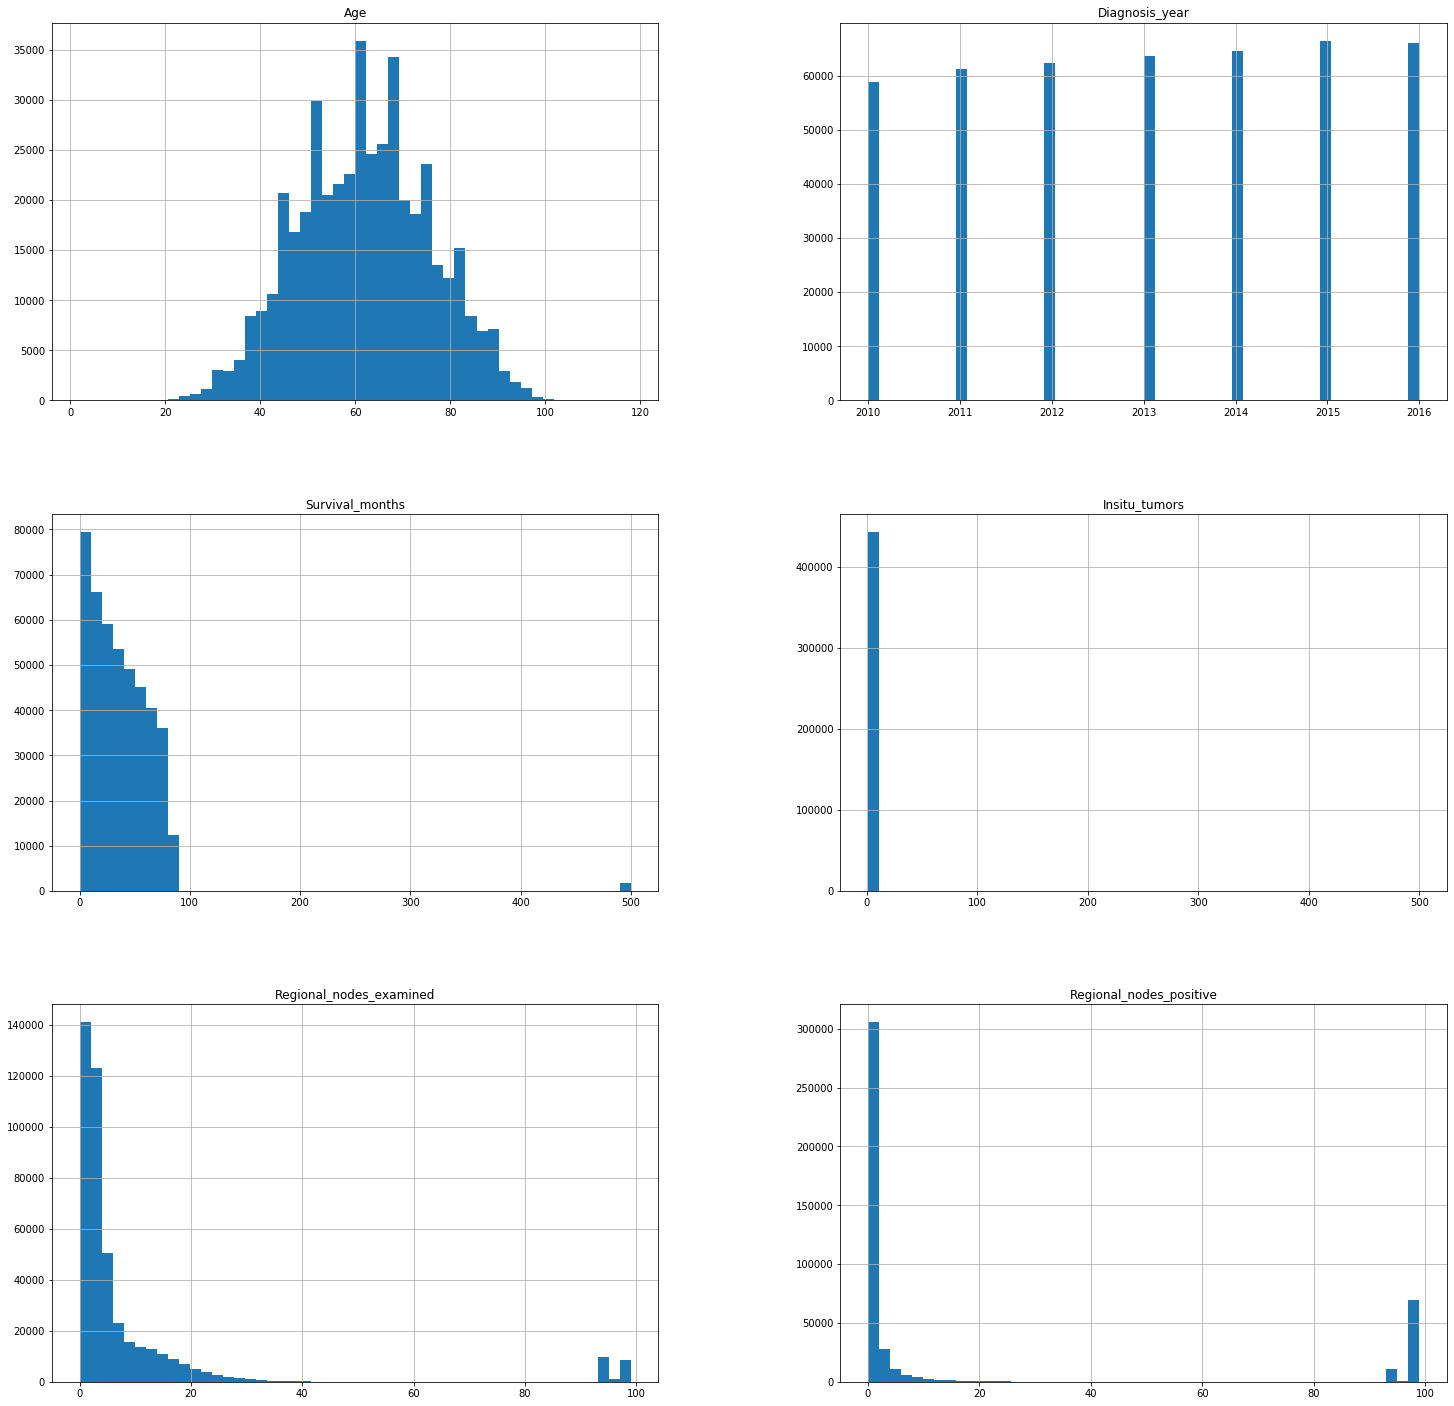

In [41]:
# Plot histograms of data features to check data distribution for each numerical feature 

seer18_bc_minus_males.hist(figsize=(25,25),bins=50)

### Between 2010-2016, 86.86% of women diagnosed with breast cancer were alive vs. 13.14% who died

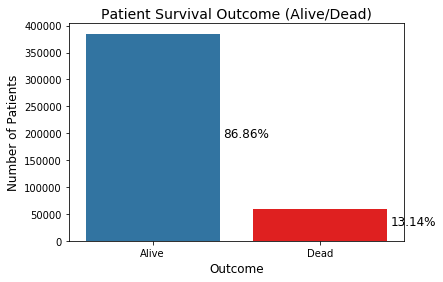

In [42]:
# BC Analysis by number of BC survivors and number dead


ax = sns.countplot(x = 'Outcome', data = seer18_bc_minus_males, palette = ['C0', 'red'])
ax.set_xlabel("Outcome", size = 12)
ax.set_ylabel("Number of Patients", size = 12)
ax.set_title("Patient Survival Outcome (Alive/Dead)", size = 14)

total = len(seer18_bc_minus_males['Outcome'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), size = 12)

plt.show()


### Highest percent of BC cases were in Whites (78.9%)

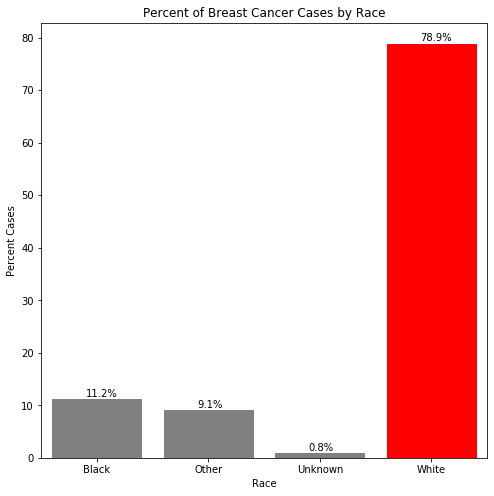

,Race,Counts,Percent of Total Cases
3,White,349582,78.86
0,Black,49578,11.18
1,Other,40425,9.12
2,Unknown,3689,0.83


In [64]:
# Grouped the data by Race and calculated perecent by race

bc_race = seer18_bc_minus_males.groupby(['Race']).size().reset_index(name = 'Counts')
bc_race['Percent of Total Cases'] = bc_race['Counts'].apply(lambda x: (100*x)/bc_race['Counts'].sum()).astype(float).round(2)


# Bar plot of the percent values

plt.figure(figsize = (8, 8))
ax = sns.barplot(data = bc_race, x = 'Race', y = 'Percent of Total Cases')
ax.set_xlabel("Race")
ax.set_ylabel("Percent Cases")
ax.set_title("Percent of Breast Cancer Cases by Race")

total = len(bc_race['Percent of Total Cases'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x,y))

for bar in ax.patches:
    if bar.get_height() > 23:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
plt.show()

bc_race.sort_values(by = 'Percent of Total Cases', ascending = False)



### Black women diagnosed with BC have the highest percent of deaths (18.6%)

<Figure size 14400x2160 with 0 Axes>

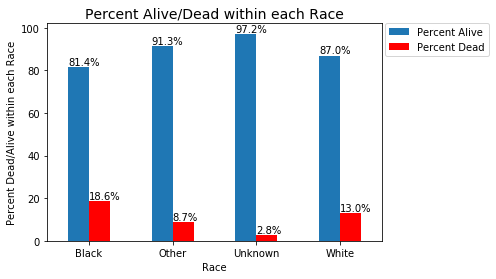

Outcome,Race,Alive,Dead,Percent Alive,Percent Dead
0,Black,40366,9212,81.42,18.58
3,White,304151,45431,87.00,13.00
1,Other,36920,3505,91.33,8.67
2,Unknown,3587,102,97.24,2.76


In [65]:
# Within the race category, calculated the death percents by each group (White, Black, etc)

race_outcome = seer18_bc_minus_males.groupby(['Race','Outcome']).size().reset_index(name = 'Counts')
race_outcome
race_outcome_pt = pd.pivot_table(race_outcome, values = 'Counts', index = ['Race'], columns = 'Outcome').reset_index()
race_outcome_pt['Percent Alive'] = (race_outcome_pt['Alive']/(race_outcome_pt['Alive'] + race_outcome_pt['Dead'])*100).astype(float).round(2)
race_outcome_pt['Percent Dead'] = (race_outcome_pt['Dead']/(race_outcome_pt['Alive'] + race_outcome_pt['Dead'])*100).astype(float).round(2)

race_outcome_pt

# Creating the bar plot to show the percent dead and alive within each insitu tumor numbers sub-group
plt.figure(figsize = (200, 30))

ax = race_outcome_pt.plot(kind = 'bar', x = 'Race', y = ['Percent Alive', 'Percent Dead'], color = ["C0", "red"])
ax.set_xlabel("Race")
ax.set_ylabel("Percent Dead/Alive within each Race")
ax.set_title("Percent Alive/Dead within each Race", size = 14)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= - 0 )

for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.25
    y = p.get_y() + p.get_height() + 0.9
    ax.annotate(n, (x,y))

plt.show()

race_outcome_pt.sort_values(by = 'Percent Dead', ascending = False)

### 50.8% of Breast Cancer patients were in the age group of 50-70

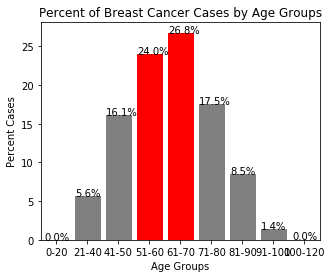

,Age Groups,Counts,Percent of Total Cases
4,61-70,118663,26.77
3,51-60,106387,24.00
5,71-80,77668,17.52
2,41-50,71473,16.12
6,81-90,37635,8.49
1,21-40,24943,5.63
7,91-100,6309,1.42
8,100-120,134,0.03
0,0-20,62,0.01


In [66]:
#  Bar Plot - Count and Percentage of Breast Cancer cases by Age Groups

bc_age_groups = seer18_bc_minus_males.groupby(['Age Groups']).size().reset_index(name = 'Counts')
bc_age_groups['Percent of Total Cases'] = bc_age_groups['Counts'].apply(lambda x: (100 * x)/bc_age_groups['Counts'].sum()).astype(float).round(2)

# Bar plot of the percent values

plt.figure(figsize = (5, 4))
ax = sns.barplot(data = bc_age_groups, x = 'Age Groups', y = 'Percent of Total Cases')
ax.set_xlabel("Age Groups")
ax.set_ylabel("Percent Cases")
ax.set_title("Percent of Breast Cancer Cases by Age Groups")

total = len(bc_age_groups['Percent of Total Cases'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.8
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x,y))

for bar in ax.patches:
    if bar.get_height() > 23:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
plt.show()

bc_age_groups.sort_values(by = 'Percent of Total Cases', ascending = False)


### BC Patients within age groups 91-100 had the highest percent of deaths (58.8%)

<Figure size 14400x2160 with 0 Axes>

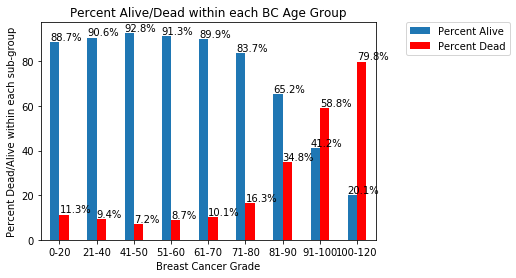

Outcome,Age Groups,Alive,Dead,Percent Alive,Percent Dead
0,0-20,55,7,88.71,11.29
1,21-40,22605,2338,90.63,9.37
2,41-50,66321,5152,92.79,7.21
3,51-60,97142,9245,91.31,8.69
4,61-70,106727,11936,89.94,10.06
5,71-80,65019,12649,83.71,16.29
6,81-90,24531,13104,65.18,34.82
7,91-100,2597,3712,41.16,58.84
8,100-120,27,107,20.15,79.85


In [67]:
# Percent deaths within each age group

agegp_outcome = seer18_bc_minus_males.groupby(['Age Groups','Outcome']).size().reset_index(name = 'Counts')
agegp_outcome_pt = pd.pivot_table(agegp_outcome, values = 'Counts', index = ['Age Groups'], columns = 'Outcome').reset_index()
agegp_outcome_pt['Percent Alive'] = (agegp_outcome_pt['Alive']/(agegp_outcome_pt['Alive'] + agegp_outcome_pt['Dead'])*100).astype(float).round(2)
agegp_outcome_pt['Percent Dead'] = (agegp_outcome_pt['Dead']/(agegp_outcome_pt['Alive'] + agegp_outcome_pt['Dead'])*100).astype(float).round(2)
agegp_outcome_pt

# Creating the bar plot to show the percent dead and alive within each insitu tumor numbers sub-group
plt.figure(figsize = (200, 30))

ax = agegp_outcome_pt.plot(kind = 'bar', x = 'Age Groups', y = ['Percent Alive', 'Percent Dead'], color = ['C0', 'red'])
ax.set_xlabel("Breast Cancer Grade")
ax.set_ylabel("Percent Dead/Alive within each sub-group")
ax.set_title("Percent Alive/Dead within each BC Age Group")
plt.legend(bbox_to_anchor=(1.4, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= - 0 )

for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.25
    y = p.get_y() + p.get_height() + 0.9
    ax.annotate(n, (x,y))

plt.show()

agegp_outcome_pt

### 41.3 % percent patients had Grade II Breast Cancer

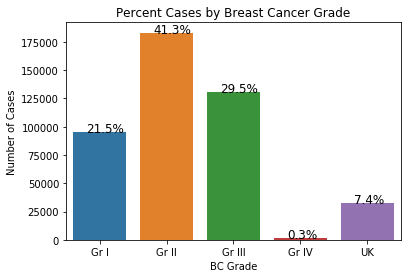

In [68]:
# BC Analysis by Grade and Cases


ax = sns.countplot(x = "Grade", data = seer18_bc_minus_males, order = ['Gr I', 'Gr II', 'Gr III', 'Gr IV', 'UK'])
ax.set_xlabel("BC Grade")
ax.set_ylabel("Number of Cases")
ax.set_title("Percent Cases by Breast Cancer Grade")
total = len(seer18_bc_minus_males['Outcome'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() - 0.6
        y = p.get_y() + p.get_height()+ 0.85
        ax.annotate(percentage, (x, y), size = 12)

plt.show()

### Unknown Grade BC had the highest percent of within group deaths (35.5%) followed by Grade IV BC (27.9%)

<Figure size 7200x2160 with 0 Axes>

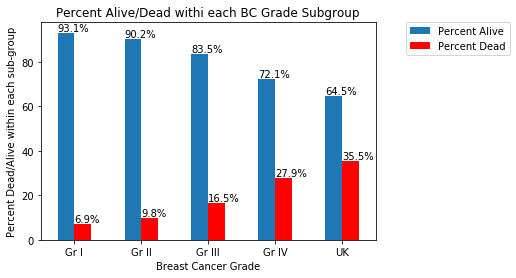

Outcome,Grade,Alive,Dead,Percent Alive,Percent Dead
0,Gr I,88659,6590,93.08,6.92
1,Gr II,165151,18039,90.15,9.85
2,Gr III,109032,21599,83.47,16.53
3,Gr IV,1060,410,72.11,27.89
4,UK,21122,11612,64.53,35.47


In [69]:
# Breast Cancer within grade group percent alive and dead

grade_tum = seer18_bc_minus_males.groupby(['Grade', 'Outcome']).size().reset_index(name = 'Counts')
grade_tum

# Pivot table with columns as Outcome will create two new columns of Aive and Dead and the values will be the Counts.
#This will allow us to calculate within group alive and dead percentages

grade_alive_dead = pd.pivot_table(grade_tum, index = 'Grade', values = 'Counts', columns = 'Outcome').reset_index()

# Calculating Percent Alive and Dead

grade_alive_dead['Percent Alive'] = grade_alive_dead['Alive'] * 100 /(grade_alive_dead['Alive'] + grade_alive_dead['Dead']).astype(float)
grade_alive_dead['Percent Dead'] = grade_alive_dead['Dead'] * 100 /(grade_alive_dead['Alive'] + grade_alive_dead['Dead']).astype(float)

grade_alive_dead['Percent Alive'] = grade_alive_dead['Percent Alive'].round(2)
grade_alive_dead['Percent Dead'] = grade_alive_dead['Percent Dead'].round(2)

# Creating the bar plot to show the percent dead and alive within each insitu tumor numbers sub-group
plt.figure(figsize = (100, 30))

ax = grade_alive_dead.plot(kind = 'bar', x = 'Grade', y = ['Percent Alive', 'Percent Dead'], color = ['C0', 'red'])
ax.set_xlabel("Breast Cancer Grade")
ax.set_ylabel("Percent Dead/Alive within each sub-group")
ax.set_title("Percent Alive/Dead withi each BC Grade Subgroup")
plt.legend(bbox_to_anchor=(1.4, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= - 0 )
for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.25
    y = p.get_y() + p.get_height() + 0.9
    ax.annotate(n, (x,y))

plt.show()

grade_alive_dead

### 39.5% percent of breast cancer patients had Stage I (SI) Breast Cancer

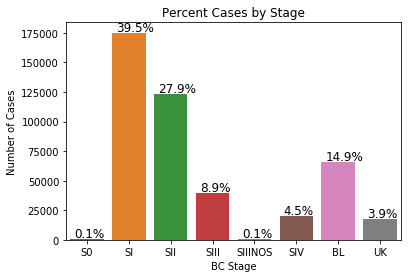

In [70]:
# BC Analysis by Stage and Percent Cases

ax = sns.countplot(x="Stage", data = seer18_bc_minus_males, order = ['S0','SI', 'SII', 'SIII', 'SIIINOS','SIV', 'BL', 'UK'])
ax.set_xlabel("BC Stage")
ax.set_ylabel("Number of Cases")
ax.set_title("Percent Cases by Stage")

total = len(seer18_bc_minus_males['Outcome'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() - 0.7
        
        y = p.get_y() + p.get_height() + 1500
        ax.annotate(percentage, (x, y), size = 12)

plt.show()

### Stage IV BC had the highest percent of within group deaths (64.4%)

<Figure size 7200x2880 with 0 Axes>

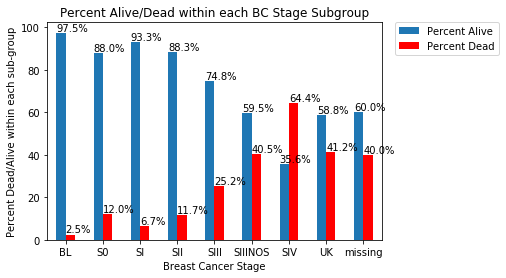

Outcome,Stage,Alive,Dead,Percent Alive,Percent Dead
6,SIV,7124,12884,35.61,64.39
7,UK,10192,7154,58.76,41.24
5,SIIINOS,253,172,59.53,40.47
8,missing,309,206,60.00,40.00
4,SIII,29523,9936,74.82,25.18
1,S0,454,62,87.98,12.02
3,SII,109193,14525,88.26,11.74
2,SI,163489,11673,93.34,6.66
0,BL,64487,1638,97.52,2.48


In [71]:
# Breast Cancer within stage group: Percent Alive and Dead

stage_tum = seer18_bc_minus_males.groupby(['Stage', 'Outcome']).size().reset_index(name = 'Counts')
stage_tum

# Pivot table with columns as Outcome will create two new columns of Aive and Dead and the values will be the Counts.
#This will allow us to calculate within group alive and dead percentages

stage_alive_dead = pd.pivot_table(stage_tum, index = 'Stage', values = 'Counts', columns = 'Outcome').reset_index()

# Calculating percent alive and dead

stage_alive_dead['Percent Alive'] = stage_alive_dead['Alive'] * 100 /(stage_alive_dead['Alive'] + stage_alive_dead['Dead']).astype(float)
stage_alive_dead['Percent Dead'] = stage_alive_dead['Dead'] * 100 /(stage_alive_dead['Alive'] + stage_alive_dead['Dead']).astype(float)

# Rounding the values to 2 decimal points

stage_alive_dead['Percent Alive'] = stage_alive_dead['Percent Alive'].round(2)
stage_alive_dead['Percent Dead'] = stage_alive_dead['Percent Dead'].round(2)

# Creating the bar plot to show the percent dead and alive within each insitu tumor numbers sub-group

plt.figure(figsize = (100, 40))
ax = stage_alive_dead.plot(kind = 'bar', x = 'Stage', y = ['Percent Alive', 'Percent Dead'], color = ['C0', 'red'])
ax.set_xlabel("Breast Cancer Stage")
ax.set_ylabel("Percent Dead/Alive within each sub-group")
ax.set_title("Percent Alive/Dead within each BC Stage Subgroup")
plt.legend(bbox_to_anchor=(1.35, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= - 0 )
for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.25
    y = p.get_y() + p.get_height() + 0.9
    ax.annotate(n, (x,y))

plt.show()

# Displaying the dataframe

stage_alive_dead.sort_values(by = 'Percent Dead', ascending = False)

### 67.1% of Breast Cancer patients had HR+/HER2- Subtype Breast Cancer

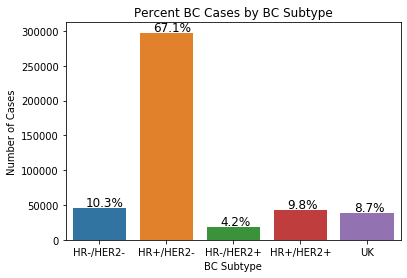

In [72]:
# BC Analysis by Percent Cases and BC Subtype

ax = sns.countplot(x = "Subtype", data = seer18_bc_minus_males, order = ['HR-/HER2-', 'HR+/HER2-', 'HR-/HER2+', 'HR+/HER2+', 'UK'])
ax.set_xlabel("BC Subtype")
ax.set_ylabel("Number of Cases")
ax.set_title("Percent BC Cases by BC Subtype")


total = len(seer18_bc_minus_males['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.6
    y = p.get_y() + p.get_height() + 2500
    ax.annotate(percentage, (x,y), size = 12)

plt.show()
            

### Unknown Subtype BC group had the highest percent of within group deaths (28.9%) followed by HR-/HER2- group (21.1%)

<Figure size 7200x2880 with 0 Axes>

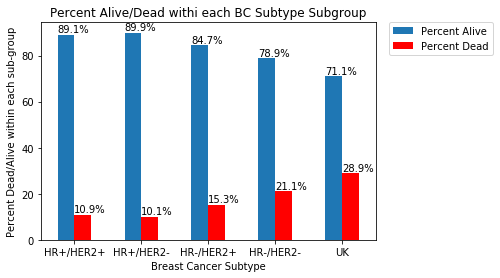

Outcome,Subtype,Alive,Dead,Percent Alive,Percent Dead
4,UK,27437,11159,71.09,28.91
3,HR-/HER2-,35926,9584,78.94,21.06
2,HR-/HER2+,15704,2834,84.71,15.29
0,HR+/HER2+,38561,4716,89.10,10.90
1,HR+/HER2-,267396,29957,89.93,10.07


In [74]:
# Breast Cancer within Subtype group:  Percent Alive and Dead

subtype_tum = seer18_bc_minus_males.groupby(['Subtype', 'Outcome']).size().reset_index(name = 'Counts')
subtype_tum

# Pivot table with columns as Outcome will create two new columns of Aive and Dead and the values will be the Counts.
#This will allow us to calculate within group alive and dead percentages

subtype_alive_dead = pd.pivot_table(subtype_tum, index = 'Subtype', values = 'Counts', columns = 'Outcome').reset_index()

# Calculating percent alive and dead

subtype_alive_dead['Percent Alive'] = (subtype_alive_dead['Alive'] * 100 /(subtype_alive_dead['Alive'] + subtype_alive_dead['Dead'])).astype(float).round(2)
subtype_alive_dead['Percent Dead'] = (subtype_alive_dead['Dead'] * 100 /(subtype_alive_dead['Alive'] + subtype_alive_dead['Dead'])).astype(float).round(2)

# Creating the bar plot to show the percent dead and alive within each subtype sub-group
plt.figure(figsize = (100, 40))

ax = subtype_alive_dead.plot(kind = 'bar', x = 'Subtype', y = ['Percent Alive', 'Percent Dead'], color = ['C0', 'red'])
ax.set_xlabel("Breast Cancer Subtype")
ax.set_ylabel("Percent Dead/Alive within each sub-group")
ax.set_title("Percent Alive/Dead withi each BC Subtype Subgroup")
plt.legend(bbox_to_anchor=(1.35, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= - 0 )
for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.25
    y = p.get_y() + p.get_height() + 0.9
    ax.annotate(n, (x,y))

plt.show()

subtype_alive_dead.sort_values(by = 'Percent Dead', ascending = False)

### 74.6% of Breast Cancer patients had 1 In Situ tumor

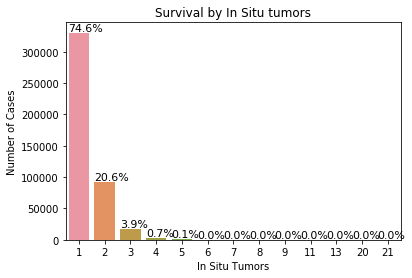

In [75]:
# BC Analysis by Percent Cases and Insitu Tumors

# Insitu tumors greater than 5 were very low or near 0%

seer18_bc_drop500 = seer18_bc_minus_males[seer18_bc_minus_males["Insitu_tumors"] != 500]
ax = sns.countplot(x="Insitu_tumors", data=seer18_bc_drop500)
ax.set_xlabel("In Situ Tumors")
ax.set_ylabel("Number of Cases")
ax.set_title("Survival by In Situ tumors")

total = len(seer18_bc_drop500['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.8
    y = p.get_y() + p.get_height() + 3000
    ax.annotate(percentage, (x,y), size = 11)

plt.show()

### BC Patients within the 7 In Situ Tumors group had the highest within group deaths (44.4%)

<Figure size 7200x2160 with 0 Axes>

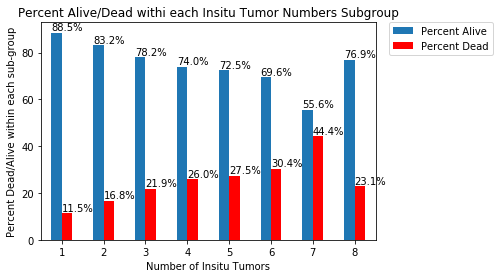

Outcome,Insitu_tumors,Alive,Dead,Percent Alive,Percent Dead
0,1,292406.0,38093.0,88.47,11.53
1,2,76174.0,15336.0,83.24,16.76
2,3,13618.0,3807.0,78.15,21.85
3,4,2290.0,804.0,74.01,25.99
4,5,428.0,162.0,72.54,27.46
5,6,80.0,35.0,69.57,30.43
6,7,10.0,8.0,55.56,44.44
7,8,10.0,3.0,76.92,23.08


In [77]:
# Bar Plot - Percent Dead and Alive within each Insitu Tumors Numbers Subgroup

insitu_tum = seer18_bc_minus_males.groupby(['Insitu_tumors', 'Outcome']).size().reset_index(name = 'Counts')

# Pivot table with columns as Outcome will create two new columns of Aive and Dead and the values will be the Counts.
#This will allow us to calculate within group alive and dead percentages

insitu_tum_alive_dead = pd.pivot_table(insitu_tum, index = 'Insitu_tumors', values = 'Counts', columns = 'Outcome').reset_index()

# Dropping the index from 8 onwards so that only 1-8 insitu tumor data is captured, since the others have NAN values

insitu_tum_alive_dead = insitu_tum_alive_dead.drop(insitu_tum_alive_dead.index[8:])
insitu_tum_alive_dead['Percent Alive'] = (insitu_tum_alive_dead['Alive'] * 100 /(insitu_tum_alive_dead['Alive'] + insitu_tum_alive_dead['Dead'])).astype(float).round(2)
insitu_tum_alive_dead['Percent Dead'] = (insitu_tum_alive_dead['Dead'] * 100 /(insitu_tum_alive_dead['Alive'] + insitu_tum_alive_dead['Dead'])).astype(float).round(2)

# Creating the bar plot to show the percent dead and alive within each insitu tumor numbers sub-group
plt.figure(figsize = (100, 30))

ax = insitu_tum_alive_dead.plot(kind = 'bar', x = 'Insitu_tumors', y = ['Percent Alive', 'Percent Dead'], color = ['C0', 'red'])
ax.set_xlabel("Number of Insitu Tumors")
ax.set_ylabel("Percent Dead/Alive within each sub-group")
ax.set_title("Percent Alive/Dead withi each Insitu Tumor Numbers Subgroup")
plt.legend(bbox_to_anchor=(1.35, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= - 0 )
for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.25
    y = p.get_y() + p.get_height() + 0.9
    ax.annotate(n, (x,y))

plt.show()

insitu_tum_alive_dead

Outcome,Insitu_tumors,Alive,Dead,Percent Alive,Percent Dead
0,1,292406,38093,88.5,11.5
1,2,76174,15336,83.2,16.8
2,3,13618,3807,78.2,21.8
3,4,2290,804,74.0,26.0
4,5,428,162,72.5,27.5
5,6,80,35,69.6,30.4
6,7,10,8,55.6,44.4
7,8,10,3,76.9,23.1


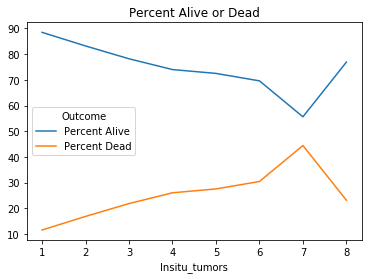

In [78]:
# Line Plot - Percent Dead and Alive within each In Situ Tumors Numbers Subgroup

instumorsoc = pd.crosstab(seer18_bc_minus_males["Insitu_tumors"], seer18_bc_minus_males["Outcome"])
instumorsoc_df = instumorsoc.drop(instumorsoc.index[8:]).reset_index()

# Add columns which calculate percent dead and alive

instumorsoc_df["Percent Alive"] = (instumorsoc_df["Alive"]/(instumorsoc_df["Alive"] + instumorsoc_df["Dead"])*100).astype(float).round(1)
instumorsoc_df["Percent Dead"] = (instumorsoc_df["Dead"]/(instumorsoc_df["Alive"] + instumorsoc_df["Dead"])*100).astype(float).round(1)

# Plot of percent alive and dead vs. number of insitu tumors

instumorsoc_df.plot(x = "Insitu_tumors", y = ["Percent Alive", "Percent Dead"], title = 'Percent Alive or Dead')

# Table view of the data

instumorsoc_df

### 57.7% of BC patients had 0 positive Regional Lymph Nodes

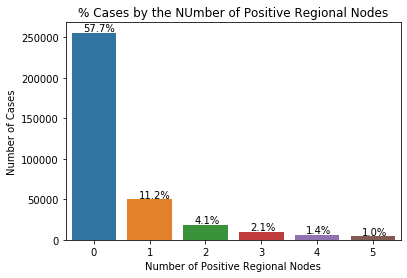

In [79]:
# BC Analysis by Percent Cases and Regional Nodes Positive


seer18_bc_minus_males_lessthan5 = seer18_bc_minus_males[seer18_bc_minus_males["Regional_nodes_positive"] <= 5]

ax = sns.countplot(x="Regional_nodes_positive", data = seer18_bc_minus_males_lessthan5)
ax.set_xlabel("Number of Positive Regional Nodes")
ax.set_ylabel("Number of Cases")
ax.set_title("% Cases by the NUmber of Positive Regional Nodes")

total = len(seer18_bc_minus_males['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.6
    y = p.get_y() + p.get_height() + 2000
    ax.annotate(percentage, (x,y))

plt.show()

### BC Patients within the 5 lymph nodes sub groups had the highest deaths (18%) 

<Figure size 7200x2160 with 0 Axes>

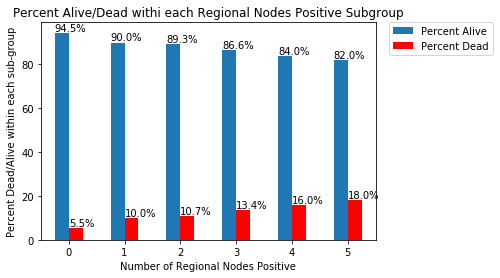

Outcome,Regional_nodes_positive,Alive,Dead,Percent Alive,Percent Dead
5,5,3494,768,81.98,18.02
4,4,5202,992,83.98,16.02
3,3,8077,1250,86.60,13.40
2,2,16410,1955,89.35,10.65
1,1,44799,4970,90.01,9.99
0,0,241601,14083,94.49,5.51


In [81]:
# Percent Dead and Alive within each Regional Nodes Positive Subgroup

reg_nodes_tum = seer18_bc_minus_males_lessthan5.groupby(['Regional_nodes_positive', 'Outcome']).size().reset_index(name = 'Counts')

# Pivot table with columns as Outcome will create two new columns of Aive and Dead and the values will be the Counts.
#This will allow us to calculate within group alive and dead percentages

reg_nodes_tum_alive_dead = pd.pivot_table(reg_nodes_tum, index = 'Regional_nodes_positive', values = 'Counts', columns = 'Outcome').reset_index()

# Calculating Percent Alive and Dead

reg_nodes_tum_alive_dead['Percent Alive'] = (reg_nodes_tum_alive_dead['Alive'] * 100 /(reg_nodes_tum_alive_dead['Alive'] + reg_nodes_tum_alive_dead['Dead'])).astype(float).round(2)
reg_nodes_tum_alive_dead['Percent Dead'] = (reg_nodes_tum_alive_dead['Dead'] * 100 /(reg_nodes_tum_alive_dead['Alive'] + reg_nodes_tum_alive_dead['Dead'])).astype(float).round(2)

# Creating the bar plot to show the percent dead and alive within each insitu tumor numbers sub-group
plt.figure(figsize = (100, 30))

ax = reg_nodes_tum_alive_dead.plot(kind = 'bar', x = 'Regional_nodes_positive', y = ['Percent Alive', 'Percent Dead'], color = ['C0', 'red'])
ax.set_xlabel("Number of Regional Nodes Positive")
ax.set_ylabel("Percent Dead/Alive within each sub-group")
ax.set_title("Percent Alive/Dead withi each Regional Nodes Positive Subgroup")
plt.legend(bbox_to_anchor=(1.35, 1),borderaxespad=0)
plt.setp( ax.xaxis.get_majorticklabels(), rotation= - 0 )
for p in ax.patches:
    n = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.25
    y = p.get_y() + p.get_height() + 0.9
    ax.annotate(n, (x,y))

plt.show()

reg_nodes_tum_alive_dead.sort_values(by = 'Percent Dead', ascending = False)


In [83]:
# Grouping the dataset by Age, Stage, Grade, Outcome

stage_grade_outcome = seer18_bc_minus_males.groupby(["Stage", 'Grade', 'Outcome']).size().reset_index(name = 'Counts')
stage_grade_outcome

# Pivot table to calculate percent alive and dead within each group (Stage/Grade)

stage_grade_outcome_alive_dead = pd.pivot_table(stage_grade_outcome, index = ['Stage','Grade'], values = 'Counts', columns = 'Outcome').reset_index()
stage_grade_outcome_alive_dead['Percent Alive'] = ((stage_grade_outcome_alive_dead['Alive']*100)/(stage_grade_outcome_alive_dead['Alive'] + stage_grade_outcome_alive_dead['Dead'])).astype(float).round(2)
stage_grade_outcome_alive_dead['Percent Dead'] = ((stage_grade_outcome_alive_dead['Dead']*100)/(stage_grade_outcome_alive_dead['Alive'] + stage_grade_outcome_alive_dead['Dead'])).astype(float).round(2)
stage_grade_outcome_alive_dead

Outcome,Stage,Grade,Alive,Dead,Percent Alive,Percent Dead
0,BL,Gr I,14475,109,99.25,0.75
1,BL,Gr II,28409,343,98.81,1.19
2,BL,Gr III,18223,478,97.44,2.56
3,BL,Gr IV,101,9,91.82,8.18
4,BL,UK,3279,699,82.43,17.57
5,S0,Gr I,6,1,85.71,14.29
6,S0,Gr II,45,2,95.74,4.26
7,S0,Gr III,186,21,89.86,10.14
8,S0,Gr IV,12,3,80.00,20.00
9,S0,UK,205,35,85.42,14.58


### Breast Cancer Distribution within States

#### Check the State descriptors

In [84]:
# Check the State County descriptors

seer18_bc_minus_males['State-county'].value_counts()

CA: Los Angeles Registry (06037)    44274
CA: San Diego County (06073)        15694
CA: Orange County (06059)           15288
WA: King County (53033)             11231
MI: Wayne County (26163)             9835
                                    ...  
GA: Webster County (13307)              8
UT: Piute County (49031)                7
CA: Alpine County (06003)               6
UT: Rich County (49033)                 5
UT: Daggett County (49009)              2
Name: State-county, Length: 614, dtype: int64

### CA had the highest percent of BC cases (40.4%)

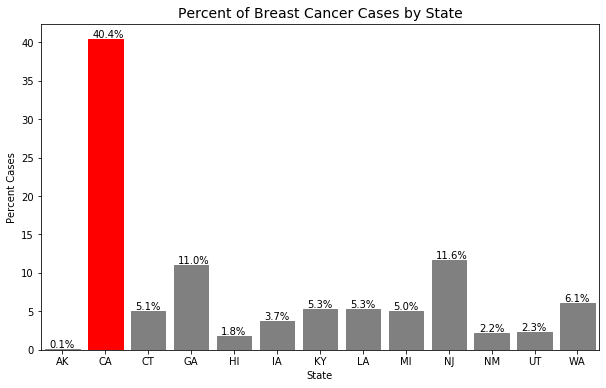

,State,Counts,Percent of Total Cases
1,CA,179022,40.39
9,NJ,51550,11.63
3,GA,48816,11.01
12,WA,27226,6.14
6,KY,23502,5.30
7,LA,23390,5.28
2,CT,22414,5.06
8,MI,22389,5.05
5,IA,16525,3.73
11,UT,10096,2.28


In [85]:
#  Bar Plot - Count and Percentage of Breast Cancer cases by Age Groups

bc_by_state = seer18_bc_region.groupby(['State']).size().reset_index(name = 'Counts')
bc_by_state['Percent of Total Cases'] = bc_by_state['Counts'].apply(lambda x: (100 * x)/bc_by_state['Counts'].sum()).astype(float).round(2)

# Bar plot of the percent values

plt.figure(figsize = (10, 6))
ax = sns.barplot(data = bc_by_state, x = 'State', y = 'Percent of Total Cases')
ax.set_xlabel("State")
ax.set_ylabel("Percent Cases")
ax.set_title("Percent of Breast Cancer Cases by State", size = 14)

total = len(bc_by_state['Percent of Total Cases'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.7
    y = p.get_y() + p.get_height() + 0.2
    ax.annotate(percentage, (x,y))

for bar in ax.patches:
    if bar.get_height() > 23:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
plt.show()

bc_by_state.sort_values(by = 'Percent of Total Cases', ascending = False)



### 24.73 % (the highest percent of recorded Breast Cancer Cases in California (CA)) were in Los Angeles

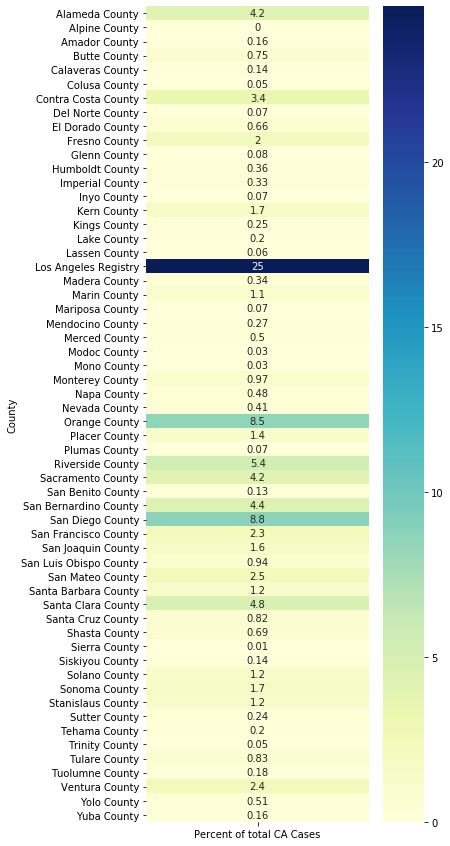

In [87]:
# Analysis 15 - CA BC Cases - Calculating the percent cases in CA at the county level

stcountyzcode = seer18_bc_region.groupby(['State', 'County', 'Zipcode']).size().reset_index(name = "Counts")
st_df = stcountyzcode[(stcountyzcode['State'] == 'CA')]

stcountyzcode_ca = st_df.groupby(['State', 'County', 'Zipcode']).agg({'Counts':'sum'})
stcountyzcode_ca ['Percent of total CA Cases'] = stcountyzcode_ca.groupby(level=0).apply(lambda x: 100*x / x.sum()).astype(float).round(2)
stcountyzcode_ca_copy = stcountyzcode_ca.copy() 

df_reset = stcountyzcode_ca_copy.reset_index()
df_reset.sort_values(ascending = False, by = 'Percent of total CA Cases', inplace = True)
df_reset

# Saving the data to a csv file
df_reset.to_csv('ca_counties.csv', index = False)

# Heatmap of BC cases by percent in CA counties (of total BC CA cases)

stheatmap_pt = pd.pivot_table(stcountyzcode_ca, values = "Percent of total CA Cases", index = 'County')
plt.figure(figsize = (5, 15))
sns.heatmap(stheatmap_pt, cmap = 'YlGnBu', annot = True)


### 7 CA Counties had around 68% of the BC Cases

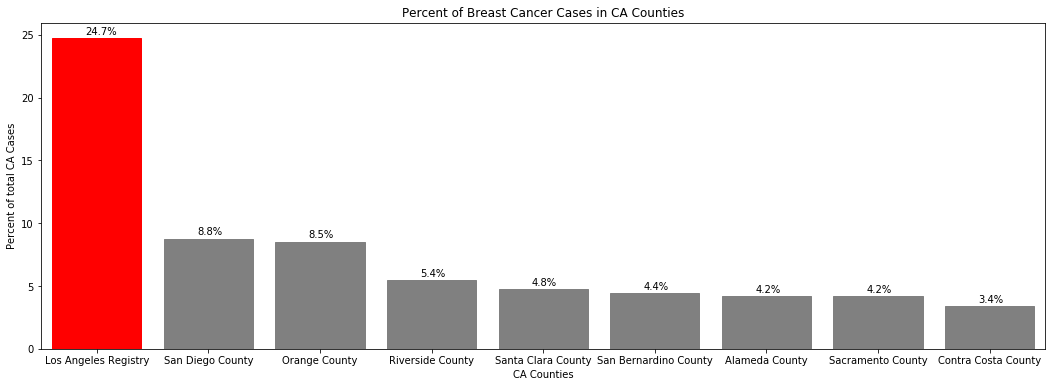

In [88]:
# Cases by CA Counties (< 3% excluded)

df_reset_percent_greater_than_3 = df_reset[(df_reset["Percent of total CA Cases"] > 3.3)]
plt.figure(figsize = (18, 6))
ax = sns.barplot(data = df_reset_percent_greater_than_3, x = 'County', y = 'Percent of total CA Cases' )
ax.set_xlabel("CA Counties")
ax.set_ylabel("Percent of total CA Cases")
ax.set_title("Percent of Breast Cancer Cases in CA Counties")

total = len(df_reset_percent_greater_than_3['Percent of total CA Cases'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_y() + p.get_height() + 0.3
    ax.annotate(percentage, (x,y))

for bar in ax.patches:
    if bar.get_height() > 23:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
plt.show()
            


### Evaluate the correlation of Percent BC Cases with Poverty Level and Median Income within the 5 CA Counties (which have the highest % BC cases within CA)

In [89]:
# Collected population, median income and % below poverty level data for all CA counties from census.gov.
# Merged this with the BC CA counties dataset to create a new file.

caseer18_bc = pd.read_csv(r"/Users/shilpakamath-jha/Desktop/ca_counties_inc_pop_poverty.csv", sep = ',')
caseer18_bc.dtypes

State                               object
County                              object
Zipcode                              int64
Counts                               int64
Percent of total CA Cases          float64
Population                           int64
Individuals Below Poverty Level     object
% Below Poverty Level              float64
Median Income                        int64
dtype: object

In [90]:
# BC Cases, % Below Poverty Level and Median Income for each of the CA Counties


caseer18_bc.info()

caseer18_bc.rename(columns = {'Individuals Below Poverty Level': '% Individuals Below Poverty Level'}, inplace = True)
caseer18_bc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            58 non-null     object 
 1   County                           58 non-null     object 
 2   Zipcode                          58 non-null     int64  
 3   Counts                           58 non-null     int64  
 4   Percent of total CA Cases        58 non-null     float64
 5   Population                       58 non-null     int64  
 6   Individuals Below Poverty Level  58 non-null     object 
 7   % Below Poverty Level            58 non-null     float64
 8   Median Income                    58 non-null     int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 4.2+ KB


,State,County,Zipcode,Counts,Percent of total CA Cases,Population,% Individuals Below Poverty Level,% Below Poverty Level,Median Income
0,CA,Alameda County,6001,7587,4.21,1671329,9.00%,9.0,92574
1,CA,Alpine County,6003,6,0.00,1129,17.30%,17.3,64688
2,CA,Amador County,6005,281,0.16,39752,11.80%,11.8,61198
3,CA,Butte County,6007,1352,0.75,219186,18.50%,18.5,48443
4,CA,Calaveras County,6009,261,0.14,45905,12.10%,12.1,58151
5,CA,Colusa County,6011,87,0.05,21547,11.00%,11.0,56704
6,CA,Contra Costa County,6013,6111,3.39,1153526,7.80%,7.8,93712
7,CA,Del Norte County,6015,120,0.07,27812,20.40%,20.4,45258
8,CA,El Dorado County,6017,1177,0.65,192843,8.10%,8.1,80582
9,CA,Fresno County,6019,3674,2.04,999101,21.30%,21.3,51261


### Positive Correlation (0.69) seen between % BC Cases and % Below Poverty Level (0.69) and Negative Correlation (-0.5) seen between % BC Cases and Median Income levels

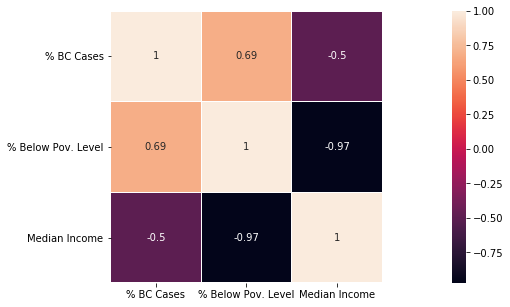

,State,County,% BC Cases,% Individuals Below Poverty Level,% Below Pov. Level,Median Income
18,CA,Los Angeles Registry,24.73,14.20%,14.2,64251
32,CA,Riverside County,5.44,12.70%,12.7,63948
36,CA,San Diego County,8.77,11.50%,11.5,74855
29,CA,Orange County,8.55,10.50%,10.5,85398
42,CA,Santa Clara County,4.75,7.30%,7.3,116178


In [93]:
# Correlation Analaysis to see if there is any correlation between poverty level  and median income with % BC Cases

caseer18_bc_drop = caseer18_bc.drop(columns = ['Zipcode', 'Counts', 'Population'])
caseer18_bc_drop.rename(columns = {
    'Percent of total CA Cases': '% BC Cases',
    '% Below Poverty Level': '% Below Pov. Level',
'Individuals Below Poverty Level': '% Individuals Below Poverty Level'}, inplace = True)

caseer18_bc_drop
caseer18_bc_minus_counts = caseer18_bc_drop.copy()
caseer18_bc_only_5counties = caseer18_bc_minus_counts[(caseer18_bc_minus_counts["County"] == "Los Angeles Registry") |
                                                      (caseer18_bc_minus_counts["County"] == "San Diego County") |
                                              (caseer18_bc_minus_counts["County"] == "Orange County") |
                                             (caseer18_bc_minus_counts["County"] == "Riverside County") |
                                               (caseer18_bc_minus_counts["County"] == "Santa Clara County")]


# Correlation evaluation between income, poverty level and number of cases for LA, SC, and Orange county
 
plt.figure(figsize = (25, 5))
sns.heatmap(caseer18_bc_only_5counties.corr(), square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':10 })
plt.show()
caseer18_bc_only_5counties.sort_values(ascending = False, by = '% Below Pov. Level', inplace = True)
caseer18_bc_only_5counties

### No Correlation seen when data from all counties is included

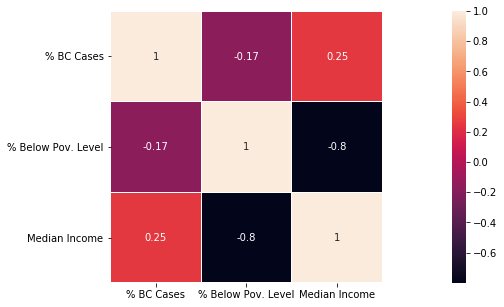

In [94]:
# Correlation evaluation between income, poverty level and number of cases for all of CA counties
# No significant correlation seen between any parameters (related to breast cancer)
 
plt.figure(figsize = (25, 5))
sns.heatmap(caseer18_bc_minus_counts.corr(), square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':10 })
plt.show()